# Notebook Overview

We will look at the keyframes in the video ___ in this notebook and we will  understand the existence of these key frames in the point cloud clusters created by DBSCAN.

# Installing Dependencies

In [ ]:
!pip install giotto-tda

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from numpy.ma.core import trace
from sklearn.decomposition import PCA
import plotly.graph_objs as go

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Global Configuration

In [ ]:
vid_path = ''
path = '/content/drive/MyDrive/Cow_teats/GH060066_dis_deep.txt'
video_path = '/content/drive/MyDrive/Cow_teats/key_frame/GH060066_resize.MP4'
file_names = ['GH060066']
base_path = "/content/drive/My Drive/Cow_teats/key_frame"
# Extracting the key frames
key_num = find_key_frame(base_path,file_names)

Key Frame Number for GH060066.mp4 are : [[ 425  950 1550 2066 3132]]


# Functions Used in the code

In [ ]:
from scipy.io import loadmat
def find_key_frame(base_path,file_names):
  ''' Function to Extract Key Frames from the mat files '''

  key_num_mat = loadmat(f"{base_path}/{file_names[0]}.mat")
  key_num = key_num_mat.get('key_num', [])
  print(f'Key Frame Number for {file_names[0]}.mp4 are : {key_num}')
  return key_num



# Start of notebook

In [ ]:
# Reading and Visualizing the deep distance matrix
df = pd.read_csv(path,header=None)
df.head()

,0
0,716.119873 727.356079 753.822449 844.945312 78...
1,730.037476 745.536377 762.036377 860.727356 77...
2,729.070190 741.973816 765.825806 862.203491 79...
3,744.068970 770.242737 783.334351 888.629150 79...
4,765.031250 776.135986 809.724548 906.133423 82...


In [ ]:
# Applying Transformation
# Converting string to float and splitting the string into separate columns
df = pd.DataFrame(df)
df_split = df[0].str.split(expand=True)
df = df_split.apply(pd.to_numeric, errors='coerce', axis=1)
# Looking at the dataframe
df.head(10)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,716.119873,727.356079,753.822449,844.945312,780.308655,747.197815,843.887207,804.595825,802.469849,848.525085,...,727.783936,783.694458,769.488708,812.934326,828.883301,814.967957,813.528076,837.079773,855.739746,1064.968994
1,730.037476,745.536377,762.036377,860.727356,773.478394,795.138367,837.157471,809.459961,804.388000,862.521851,...,722.837524,797.229675,783.389038,836.395386,822.573303,823.004395,811.452026,857.641357,890.131042,1069.000854
2,729.070190,741.973816,765.825806,862.203491,790.784180,763.022705,845.384155,827.264648,802.421997,865.150269,...,726.069031,794.511597,782.627075,833.041626,838.995361,825.551514,811.357056,846.268616,855.464233,1063.179932
3,744.068970,770.242737,783.334351,888.629150,796.824036,789.113708,846.398804,831.489258,814.012817,877.839111,...,725.075989,818.529297,806.746155,864.591858,845.962280,841.214722,825.400024,851.050720,888.292358,1083.436279
4,765.031250,776.135986,809.724548,906.133423,828.628052,773.053406,883.291992,857.601685,833.248108,891.004944,...,760.993286,830.137695,823.682617,875.232056,871.049316,856.794800,851.808472,875.479065,881.930664,1102.037598
5,735.764648,753.990112,800.935059,880.129822,822.939941,770.011108,854.020752,838.570984,818.412598,878.770996,...,736.446533,803.960938,812.644531,849.394653,852.317627,821.190308,853.191406,868.921997,910.227295,1105.431152
6,717.985291,736.239624,799.116516,867.599121,823.212158,769.726318,851.635498,842.288330,800.718628,862.223511,...,733.685486,790.963928,799.171509,835.375000,843.152649,806.626953,836.879272,871.547668,894.981689,1098.936646
7,712.780884,735.267517,790.942932,871.082031,818.868225,806.899414,835.825684,846.092651,807.262390,869.754517,...,719.838623,793.065918,808.641235,834.368164,833.159668,799.406372,823.944092,885.400085,911.235596,1088.200317
8,732.679321,739.333618,808.944092,893.179749,835.637939,800.519409,843.589722,860.720703,829.659973,891.480469,...,740.570007,814.912170,825.247681,846.510681,859.088379,816.391785,852.110962,902.604431,928.022827,1112.914062
9,745.719360,771.524292,828.379272,921.364136,829.617615,815.528442,821.011963,864.385742,836.145142,912.013550,...,742.816284,841.822144,837.486816,861.665649,866.636169,818.884033,865.672668,883.565918,949.604736,1122.080078


In [ ]:
print(df.head(5))
print(key_num)
print(df.shape)
print(df.describe([0.05,0.25,0.5,0.75,0.95]))
print(df.isnull().sum())

           0           1           2           3           4           5   \
0  716.119873  727.356079  753.822449  844.945312  780.308655  747.197815   
1  730.037476  745.536377  762.036377  860.727356  773.478394  795.138367   
2  729.070190  741.973816  765.825806  862.203491  790.784180  763.022705   
3  744.068970  770.242737  783.334351  888.629150  796.824036  789.113708   
4  765.031250  776.135986  809.724548  906.133423  828.628052  773.053406   

           6           7           8           9   ...          22  \
0  843.887207  804.595825  802.469849  848.525085  ...  727.783936   
1  837.157471  809.459961  804.388000  862.521851  ...  722.837524   
2  845.384155  827.264648  802.421997  865.150269  ...  726.069031   
3  846.398804  831.489258  814.012817  877.839111  ...  725.075989   
4  883.291992  857.601685  833.248108  891.004944  ...  760.993286   

           23          24          25          26          27          28  \
0  783.694458  769.488708  812.934326  

In [ ]:
from gtda.time_series import SlidingWindow
# Looking at all the columns together
windows = SlidingWindow(size=100, stride=1)
# Fit and transform X
X_windows = windows.fit_transform(df)
X_windows_idx = windows.fit_transform(df.index)
print(f'Shape of the Sliding Window : {X_windows.shape}')
print(X_windows)
print(f'Shape of the Sliding Window Indexes : {X_windows_idx.shape}')
print(X_windows_idx)
# Creating the persistence diagrams for the first window
#plot_point_cloud(X_windows[:,:,1]) #Change 0 for looking at the persistence diagram for other windows

Shape of the Sliding Window : (3093, 100, 32)
[[[ 716.119873  727.356079  753.822449 ...  837.079773  855.739746
   1064.968994]
  [ 730.037476  745.536377  762.036377 ...  857.641357  890.131042
   1069.000854]
  [ 729.07019   741.973816  765.825806 ...  846.268616  855.464233
   1063.179932]
  ...
  [ 968.406189 1002.931335 1049.223999 ... 1075.35022  1149.224976
   1233.32373 ]
  [ 952.403931  992.677307 1032.240479 ... 1058.684326 1126.062744
   1222.503906]
  [ 974.259033 1013.655884 1058.835938 ... 1078.289551 1132.562256
   1250.931274]]

 [[ 730.037476  745.536377  762.036377 ...  857.641357  890.131042
   1069.000854]
  [ 729.07019   741.973816  765.825806 ...  846.268616  855.464233
   1063.179932]
  [ 744.06897   770.242737  783.334351 ...  851.05072   888.292358
   1083.436279]
  ...
  [ 952.403931  992.677307 1032.240479 ... 1058.684326 1126.062744
   1222.503906]
  [ 974.259033 1013.655884 1058.835938 ... 1078.289551 1132.562256
   1250.931274]
  [ 979.953735 1031.52124  

In [ ]:
import numpy as np
from gtda.time_series import SingleTakensEmbedding

STE = SingleTakensEmbedding(parameters_type='search')
# Fit and transform
kf_0 = STE.fit_transform(np.array(pd.DataFrame(X_windows[425])[pd.DataFrame(X_windows[425]).index==0])[0])
kf_1 = STE.fit_transform(np.array(pd.DataFrame(X_windows[950])[pd.DataFrame(X_windows[950]).index==0])[0])
kf_2 = STE.fit_transform(np.array(pd.DataFrame(X_windows[1550])[pd.DataFrame(X_windows[1550]).index==0])[0])
kf_3 = STE.fit_transform(np.array(pd.DataFrame(X_windows[2066])[pd.DataFrame(X_windows[2066]).index==0])[0])
rand_int = np.random.randint(0,3192)
#print(rand_int)
#nkf_1 = STE.fit_transform(np.array(pd.DataFrame(X_windows[rand_int])[pd.DataFrame(X_windows[rand_int]).index==0])[0])

In this block of code, we are looking at the frames in the data frame which are the keyframes and plotting the point cloud for these keyframes.
Also, we are randomly looking at a row which is not the key frame and comparing it with the key frames.

In [ ]:
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud
_not_frame = STE.fit_transform(np.array(pd.DataFrame(X_windows[rand_int])[pd.DataFrame(X_windows[rand_int]).index==18])[0])
pca = PCA(n_components=3)
Kf_0 = pca.fit_transform(kf_0)
Kf_1 = pca.fit_transform(kf_1)
Kf_2 = pca.fit_transform(kf_2)
Kf_3 = pca.fit_transform(kf_3)
nfk_1 = pca.fit_transform(_not_frame)
# Plotting the point cloud for the first Key Frame
plot_point_cloud(Kf_0)

In [ ]:
# Plotting the point cloud for the second Key Frame
plot_point_cloud(Kf_1)

In [ ]:
# Plotting the point cloud for the third Key Frame
plot_point_cloud(Kf_2)

In [ ]:
# Plotting the point cloud for the fourth Key Frame
plot_point_cloud(Kf_3)

In [ ]:
# Plotting the point cloud for the random frame which is not the key frame .
plot_point_cloud(nfk_1)

The random extracted frame has 4 components while the key frames has 3 connected compnents in the point cloud.

In [ ]:
X_windows.shape

(3093, 100, 32)

# Comparing 3 windows simultaneously

In [ ]:


#Function to prepare a 3D scatter trace
def prepare_3d_scatter_trace(point_cloud, name, color):
    pca = PCA(n_components=32)   # Initialize PCA to reduce to 3 dimensions
    point_cloud_3d = pca.fit_transform(point_cloud)  # Apply PCA

    trace = go.Scatter3d(
        x=point_cloud_3d[:, 0], y=point_cloud_3d[:, 1], z=point_cloud_3d[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=color,
            opacity=0.8
        ),
        name=name
    )
    return trace

#Prepare traces for the three-point clouds
trace0 = prepare_3d_scatter_trace(X_windows[0], 'Window 0', 'blue')
trace425 = prepare_3d_scatter_trace(X_windows[425], 'Window 425', 'red')
trace427 = prepare_3d_scatter_trace(X_windows[430], 'Window 427', 'green')

# Combine the traces
data = [trace0, trace425, trace427]

# Define the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='x'),
        yaxis=dict(title='y'),
        zaxis=dict(title='PC3'),
    ),
    title='Comparison of Two Point Clouds'
)

# Plot the figure
fig = go.Figure(data=data, layout=layout)
fig.show()


    The blue points correspond to Window[0] which is not a keyframe
    
    The green points correspond to Window[425] which is  a keyframe
    
    The red points correspond to Window[427] which is not a keyframe but close to the key frame

# Calculating the L2 Norm for the

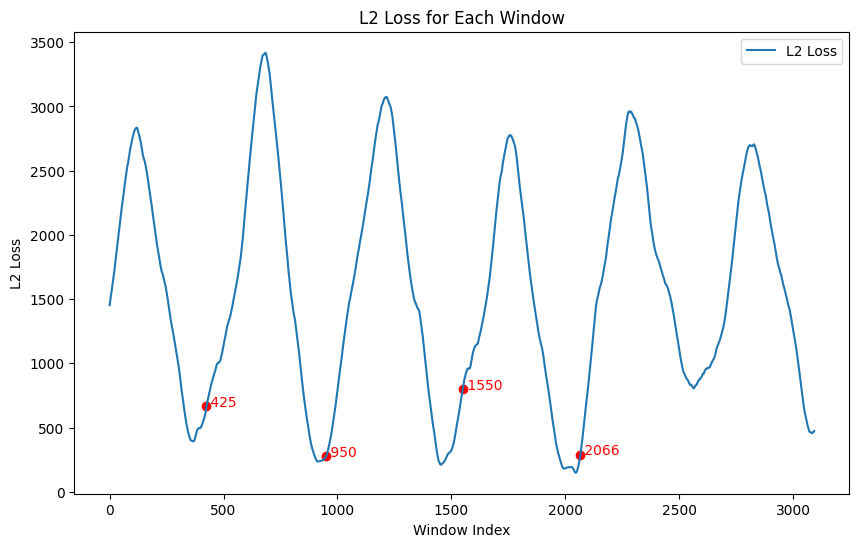

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Key frame numbers
key_frame_numbers = np.array([425, 950, 1550, 2066, 3132])

# Extract the key frame rows from the original dataframe
key_frame_rows = df.iloc[key_frame_numbers]

# Calculate the mean of the key frame rows
y_true = key_frame_rows.mean(axis=0).values

# Initialize an array to hold the L2 loss for each window
l2_losses = np.zeros(X_windows.shape[0])

# Calculate the L2 loss for each window
for i, window in enumerate(X_windows):
    # Calculate the mean and L2 loss of the points in the window
    y_pred = window.mean(axis=0)
    l2_losses[i] = np.linalg.norm(y_pred - y_true)

# Plot the L2 loss for each window
plt.figure(figsize=(10, 6))
plt.plot(l2_losses, label='L2 Loss')

# Plot keyframes
for kf in key_frame_numbers:
    if kf < len(l2_losses):
        plt.scatter(kf, l2_losses[kf], color='red')
        plt.text(kf, l2_losses[kf], f' {kf}', color='red')  # Annotate index

plt.title('L2 Loss for Each Window')
plt.xlabel('Window Index')
plt.ylabel('L2 Loss')
plt.legend()
plt.show()


Keyframe index: 425, t-SNE Coordinates: (-62.07927322387695, -3.6849300861358643)
Keyframe index: 950, t-SNE Coordinates: (-34.24488067626953, 15.28973388671875)
Keyframe index: 1550, t-SNE Coordinates: (-33.658023834228516, 55.92523193359375)
Keyframe index: 2066, t-SNE Coordinates: (19.638351440429688, 51.2128791809082)


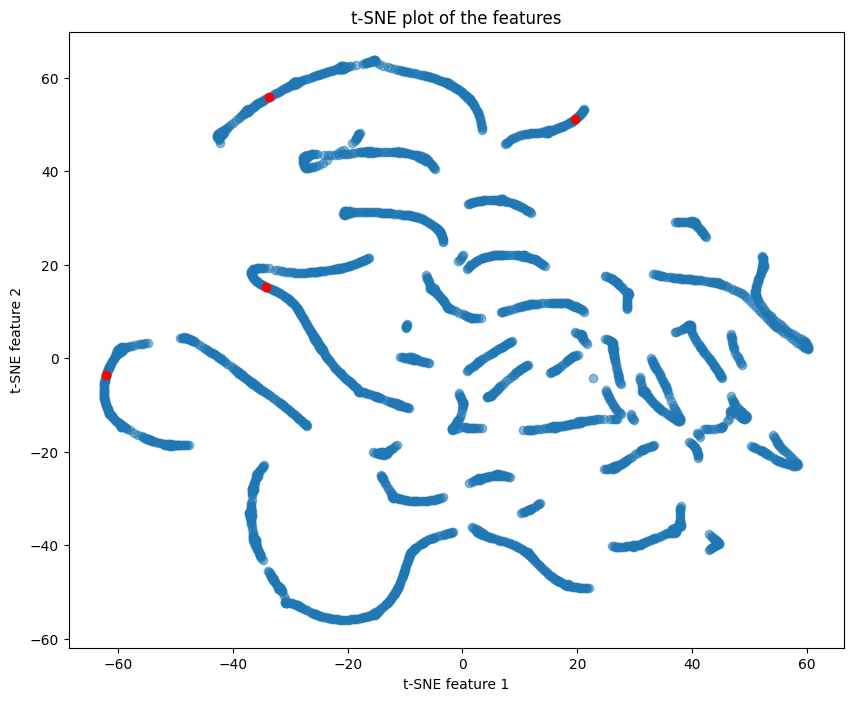

In [ ]:
# Feature extraction: calculate mean and standard deviation for each window
features = np.array([window.mean(axis=0) for window in X_windows])
features_std = np.array([window.std(axis=0) for window in X_windows])
combined_features = np.hstack((features, features_std))

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(combined_features)

# Dimensionality reduction for visualization
tsne = TSNE(n_components=2, random_state=42)
features_reduced = tsne.fit_transform(features_scaled)

# Adjust key_frame_numbers to fit within the range of X_windows
valid_key_frame_numbers = [kf for kf in key_frame_numbers if kf < X_windows.shape[0]]

# Visualising the  reduced features
plt.figure(figsize=(10, 8))
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], alpha=0.5)

# Plot and print the indices of the keyframes
for kf in valid_key_frame_numbers:
    plt.scatter(features_reduced[kf, 0], features_reduced[kf, 1], color='red')  # Keyframes
    print(f"Keyframe index: {kf}, t-SNE Coordinates: ({features_reduced[kf, 0]}, {features_reduced[kf, 1]})")

plt.title('t-SNE plot of the features')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


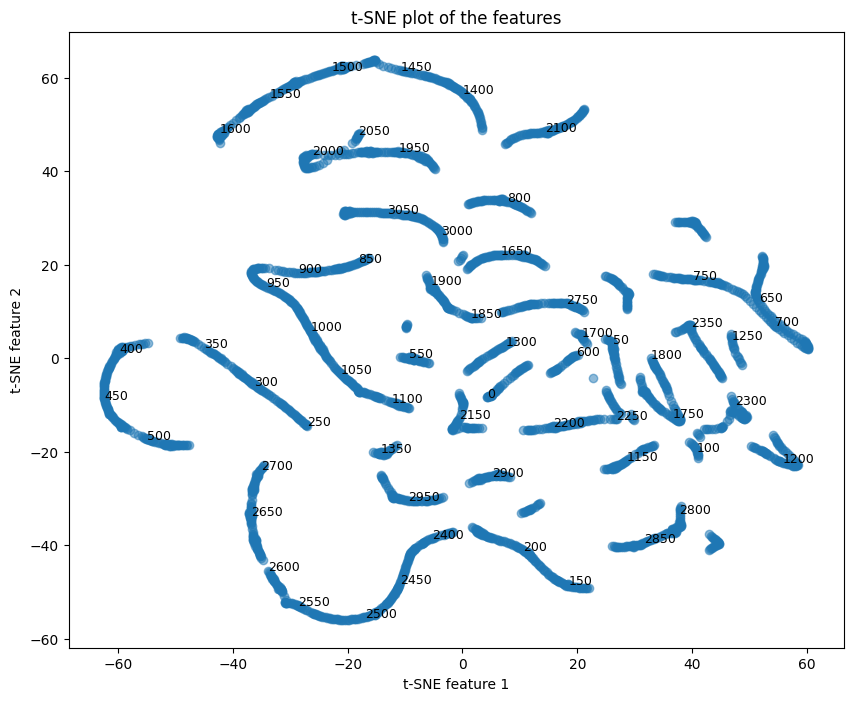

In [ ]:
# Feature extraction: calculate mean and standard deviation for each window
features = np.array([window.mean(axis=0) for window in X_windows])
features_std = np.array([window.std(axis=0) for window in X_windows])
combined_features = np.hstack((features, features_std))

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(combined_features)

# Dimensionality reduction for visualization
tsne = TSNE(n_components=2, random_state=42)
features_reduced = tsne.fit_transform(features_scaled)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], alpha=0.5)

# Optionally, you can label some points to see their indices
for i, point in enumerate(features_reduced):
    if i % 50 == 0:  # Label every 50th point to avoid clutter
        plt.text(point[0], point[1], str(i), fontsize=9)

plt.title('t-SNE plot of the features')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


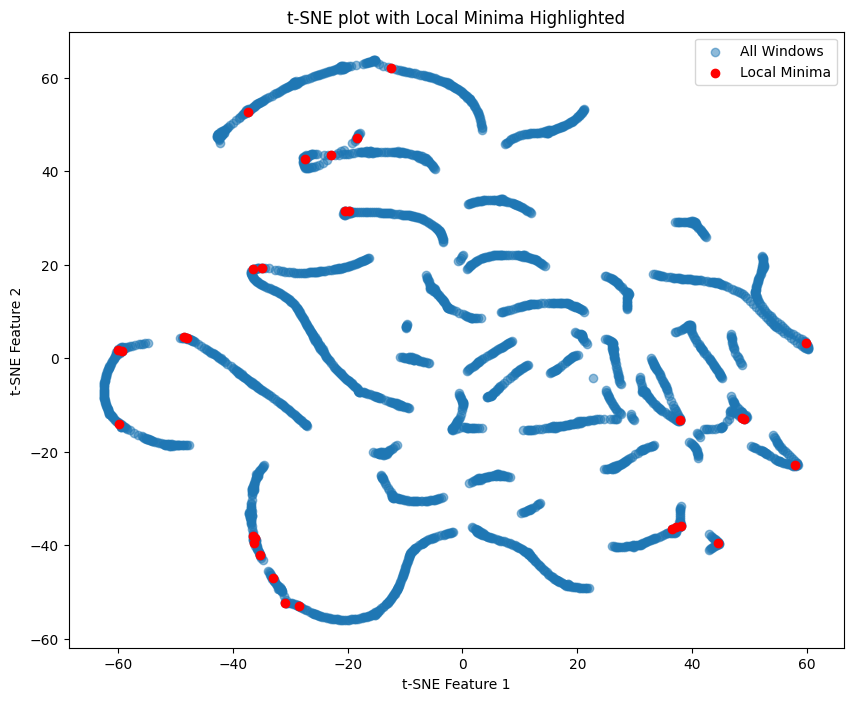

[ 118  365  369  393  396  479  675  914  923 1211 1453 1577 1758 1994
 2016 2046 2279 2284 2548 2563 2592 2606 2621 2629 2632 2810 2816 2820
 3076 3082]
[ 425  950 1550 2066 3132]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.signal import argrelextrema

# Step 1: Calculate the L2 Norm for Each Window
l2_norms = np.array([np.linalg.norm(window.mean(axis=0) - y_true) for window in X_windows])

# Step 2: Identify Local Minima from the L2 Norm
local_minima_indices = argrelextrema(l2_norms, np.less)[0]

# Step 3: Feature extraction and Standardization
#features = np.array([window.mean(axis=0) for window in X_windows])
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)

# Step 4: t-SNE Transformation
tsne = TSNE(n_components=2, random_state=42)
features_reduced = tsne.fit_transform(features_scaled)

# Step 5: Plot t-SNE and Highlight Local Minima
plt.figure(figsize=(10, 8))
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], alpha=0.5, label='All Windows')

# Highlight the local minima in the t-SNE plot
for idx in local_minima_indices:
    plt.scatter(features_reduced[idx, 0], features_reduced[idx, 1], color='red', label='Local Minima' if idx == local_minima_indices[0] else "")

plt.title('t-SNE plot with Local Minima Highlighted')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()
print(local_minima_indices)
print(key_frame_numbers)




In [ ]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

VR = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=-1)

# Fit and transform the t-SNE data
diagrams = VR.fit_transform(features_reduced.reshape(1, *features_reduced.shape))

# Plot the persistence diagram
plot_diagram(diagrams[0])


# Next Steps

    Look at the frame indexes extracted

    Look if there is any similar pattern for other videos.

    Look at these indexes in the persistence graph and the birth and death of these feature points for further anlaysis .

    Fix the errors in the code